## Introduction - Unsupervised Analysis for Engangement Pattern Disection

As a marketing consultant of a Thai marketing consulting agency, my task was to examine Facebook Live use trends in order to determine the success of video content for Thai vendors. Social media usage is an important component of digital marketing, and knowing which content drives the most engagement is essential to directing clients' content marketing strategies. The organization has long guessed that video posts produce the most engagement, and my objective was to test that theory and develop more insights in order to guide future strategy. 

Through extensive exploratory data analysis, I explored the pattern of engagement of different types of content (video, photo, and text) on metrics including comments, likes, shares, and emotional responses. I complemented this analysis with unsupervised machine learning techniques like clustering and principal component analysis to discover patterns in engagement by content type. To make an estimate of video post probability and provide actionable results, I built logistic regression models that helped us verify our hypothesis and determine most important areas of content strategy improvement.

This report is not only about reiterating the importance of video content but also about ensuring clients have a well-rounded content strategy where every type of post (videos, images, and text) is utilized to the fullest to gain maximum engagement. With the supply of facts-based insights, we seek to enable our clients to optimize their social media plan and enhance their content performance overall.

<h3>Part I: Preparing the data </h3><br>

In [94]:
#importing packages
import numpy             as np                                                 # mathematical essentials
import pandas            as pd                                                 # data science essentials
import matplotlib.pyplot as plt                                                # fundamental data visualization
import seaborn           as sns                                                # enhanced visualization
import sys                                                                     # system-specific parameters and functions


#packages for unsupervised learning
from sklearn.decomposition   import PCA                                        # pca
from sklearn.datasets        import load_digits                                # digits dataset
from sklearn.preprocessing   import StandardScaler                             # standard scaler              
from scipy.cluster.hierarchy import dendrogram, linkage                        # dendrograms
from sklearn.cluster         import KMeans                                     # k-means clustering
from sklearn.preprocessing   import PowerTransformer  
from sklearn.preprocessing   import power_transform 
from sklearn.model_selection import train_test_split                           # train-test split
from sklearn.metrics         import confusion_matrix, roc_auc_score            # results analysis
import sklearn.linear_model                                                    # classification modeling



#loading the data
facebook = pd.read_excel('./Facebook_Live_Data.xlsx')


#setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
np.set_printoptions(threshold=sys.maxsize)

#checking the first 10 rows
facebook.head(n = 10)

,status_id,status_type,time_published,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,photo,2017-09-27 02:58:00,7,0,14,0,0,0,0,0
1,2,photo,2017-09-27 03:42:00,3,0,12,0,0,0,0,0
2,3,photo,2017-09-27 03:54:00,17,3,19,0,0,0,0,0
3,4,photo,2017-09-27 08:54:00,39,0,24,0,0,0,0,0
4,5,photo,2017-09-28 01:50:00,17,0,31,0,0,0,0,0
5,6,photo,2017-09-28 08:20:00,1,0,20,0,0,0,0,0
6,7,photo,2017-09-28 08:46:00,17,2,48,0,0,0,0,0
7,8,photo,2017-09-28 09:05:00,0,0,21,0,0,0,0,0
8,9,photo,2017-09-29 04:14:00,2,0,19,0,0,0,0,0
9,10,photo,2017-09-30 00:17:00,9,0,25,0,0,0,0,0


<h3> Part II : Performing the EDA <h3>


Size of Original Dataset
------------------------
Observations (rows): 2362
Features (columns) : 11

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   status_id       2362 non-null   int64         
 1   status_type     2362 non-null   object        
 2   time_published  2362 non-null   datetime64[ns]
 3   num_comments    2362 non-null   int64         
 4   num_shares      2362 non-null   int64         
 5   num_likes       2362 non-null   int64         
 6   num_loves       2362 non-null   int64         
 7   num_wows        2362 non-null   int64         
 8   num_hahas       2362 non-null   int64         
 9   num_sads        2362 non-null   int64         
 10  num_angrys      2362 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(1)
memory usage: 203.1+ KB

Missing Values in Each Column:
 status_id  

,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,total_engagement
num_comments,1.000000,0.716612,0.091310,0.574094,0.177405,0.385538,0.220421,0.193308,0.890286
num_shares,0.716612,1.000000,0.156420,0.832527,0.343861,0.452469,0.212623,0.269912,0.747605
num_likes,0.091310,0.156420,1.000000,0.186789,0.194138,0.111061,0.054664,0.060413,0.523057
num_loves,0.574094,0.832527,0.186789,1.000000,0.446731,0.555411,0.245123,0.321304,0.642911
num_wows,0.177405,0.343861,0.194138,0.446731,1.000000,0.313324,0.088612,0.151484,0.278825
num_hahas,0.385538,0.452469,0.111061,0.555411,0.313324,1.000000,0.186791,0.164267,0.412172
num_sads,0.220421,0.212623,0.054664,0.245123,0.088612,0.186791,1.000000,0.082456,0.223606
num_angrys,0.193308,0.269912,0.060413,0.321304,0.151484,0.164267,0.082456,1.000000,0.214356
total_engagement,0.890286,0.747605,0.523057,0.642911,0.278825,0.412172,0.223606,0.214356,1.000000



Average Total Engagement by Content Type:
 status_type
video    1130.023611
text      493.310030
photo     195.813404
Name: total_engagement, dtype: float64


C:\Users\Admin\AppData\Local\Temp\ipykernel_29348\479293565.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_engagement_by_type.index, y=avg_engagement_by_type.values, palette="viridis")
C:\tools\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\tools\Anaconda3\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\tools\Anaconda3\Lib\site-packages\seaborn\_

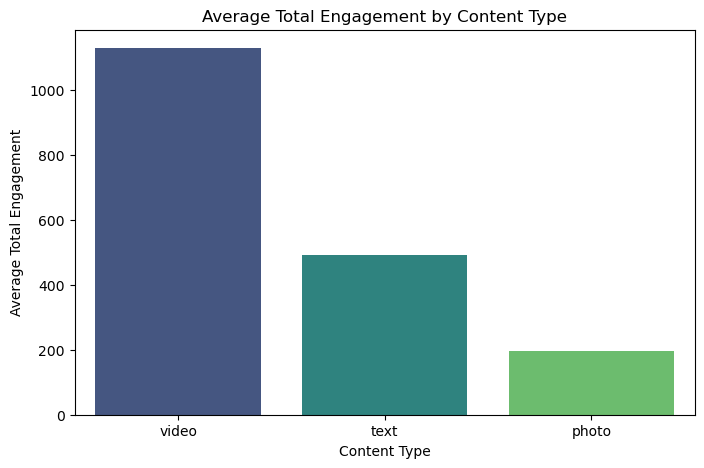


Average Reactions by Content Type:
              num_comments  num_shares   num_likes  num_loves  num_wows  num_hahas  num_sads  num_angrys
status_type                                                                                            
photo           22.989337    3.044935  167.900228   0.956588  0.599391   0.117289  0.150800    0.054836
text            38.544073    3.085106  448.650456   1.413374  1.106383   0.112462  0.382979    0.015198
video          700.216667  122.737500  263.916667  37.727778  2.577778   2.111111  0.454167    0.281944


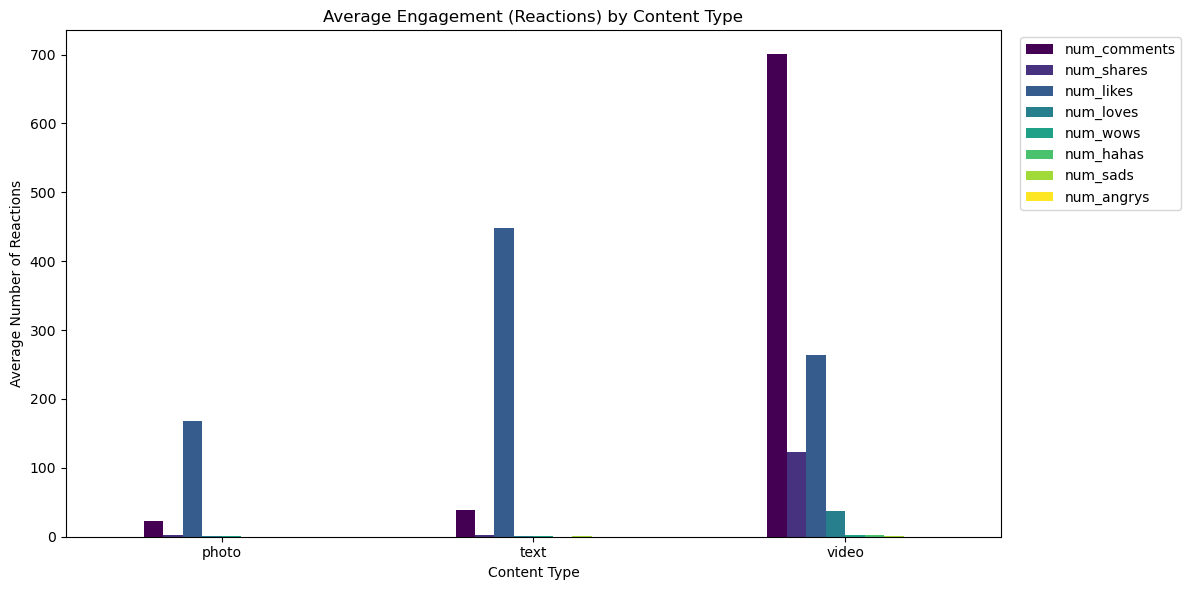


Average Video Engagement by Hour:
 hour_published
0      806.258065
1      933.972727
2      772.357143
3      610.142857
4      824.833333
5      653.380952
6     1296.931818
7     1055.536765
8     1968.987179
9     2160.302326
10    1545.233333
11    1534.200000
12     808.375000
13     572.400000
14     500.750000
17    1495.000000
19      76.000000
20      20.000000
21     847.666667
22     561.343750
23    1030.241379
Name: total_engagement, dtype: float64


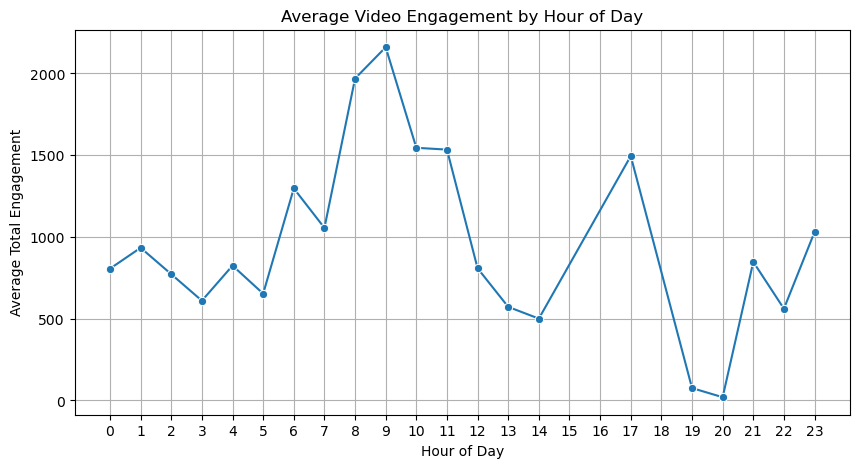

In [97]:
#formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations (rows): {facebook.shape[0]}
Features (columns) : {facebook.shape[1]}
""")

#retrieving information about each variable
facebook.info(verbose=True)

#checking for missing values
missing_values = facebook.isnull().sum()
print("\nMissing Values in Each Column:\n", missing_values)

#checking the first 10 rows
facebook.head(n=10)

#combining all engagement metrics into a single total_engagement column
engagement_columns = ['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
facebook['total_engagement'] = facebook[engagement_columns].sum(axis=1)

#checking the correlation between numerical variables
correlation_matrix = facebook[engagement_columns + ['total_engagement']].corr()
correlation_df = pd.DataFrame(correlation_matrix)
display(correlation_df)

#summarising average total engagement by content type
avg_engagement_by_type = facebook.groupby('status_type')['total_engagement'].mean().sort_values(ascending=False)
print("\nAverage Total Engagement by Content Type:\n", avg_engagement_by_type)

#visualising average total engagement by content type
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_engagement_by_type.index, y=avg_engagement_by_type.values, palette="viridis")
plt.title("Average Total Engagement by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Average Total Engagement")
plt.show()


#summarising average engagement per reaction by content type
avg_reactions_by_type = facebook.groupby('status_type')[engagement_columns].mean()
print("\nAverage Reactions by Content Type:\n", avg_reactions_by_type)

#visualising specific reactions by content type
avg_reactions_by_type.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Average Engagement (Reactions) by Content Type")
plt.ylabel("Average Number of Reactions")
plt.xlabel("Content Type")
plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

#investigating engagement for videos specifically by hour of the day
facebook['hour_published'] = pd.to_datetime(facebook['time_published']).dt.hour

#filtering video posts only
video_posts = facebook[facebook['status_type'] == 'video']

# average video engagement by hour
avg_video_engagement_by_hour = video_posts.groupby('hour_published')['total_engagement'].mean()
print("\nAverage Video Engagement by Hour:\n", avg_video_engagement_by_hour)

#visualising average video engagement by hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=avg_video_engagement_by_hour.index, y=avg_video_engagement_by_hour.values, marker='o')
plt.title("Average Video Engagement by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Total Engagement")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**EDA Analysis**

As part of my EDA of the Facebook Live seller content in Thailand, I looked into how different types of content, namely video, text, and photo perform in terms of engagement and reactions. My comparison of aggregate engagement by the type of content provided me with insights such that videos way outperformed text, in addition to image postings. Vidoes altogether top the type of medium, with nearly 1130 total engagements, or 493 more than text, and 196 more than images, demonstrating once again that it is the most engaging. When I filter out engagement by individual reactions like likes, loves, and other grades of emotion, videos dominated most of them. For example, video posts received far more comments (700) and shares (123) on average, two of the best indicators of quality engagement.

Interestingly, despite videos dominating nearly every emotional response category, such as loves (37.7), wows (2.6), and hahas (2.1), text posts actually performed better in the likes category, with an average of 449 likes versus 263 for videos. This can be explained by considering that although videos are more expressive and subject to controversy, text posts continue at the center of delivering bite-sized or informative messages to which users freely like. From a correlation point of view, I found shares (0.75) and comments (0.89) to correlate most with interactive total engagement, which further reflects the importance of interactive measures that are generally under the control of videos.

In order to grasp video viewing behavior trend further, I further checked how mean total engagement differs by hour of day. The results indicated that activity is not evenly distributed throughout the day some times considerably more than others. Specifically, posts at 9 AM and re-posts again later in the afternoon at 5 PM generate the highest mean interaction, with the 9 AM being a high of over 2,100 mean interactions. On the other hand, interaction decreases significantly in the early evening time slot, particularly 7PM  to 8PM, with mean interaction approaching zero. There is a second dip at midday (1–2 PM). These findings suggest that timing is an important factor in achieving the greatest impact from video content. Posting during high-engagement times when there are peak open windows especially in the morning hours can help sellers reach viewers better and connect with them. This suggests the importance of not just what is posted, but when it is posted as well.

Some of the caveats that can be highlighted are -  there are some effectiveness to video performances. While videos do depict more sad reaction and angry reactions than other formats, not all emotional engagement is desirable. This implies that while video content does attract attention and elicit reaction, the nature of the reaction might be contingent upon the tone or message of the content. This tells us as to how important it is to align video content with the brand intention and audience expectation. Videos may also perform better in some cases, such as during periods of heavy traffic, with specialized audiences, or for product demonstrations and storytelling, which take full advantage of the visual and auditory strengths of the format.

<h3>Part III: PCA and Factor Loadings </h3><br>


Explained Variance Ratios:
[0.3840492  0.11701089 0.10572931 0.10268156 0.09489762 0.0739113
 0.0679572  0.0395566  0.01420631]


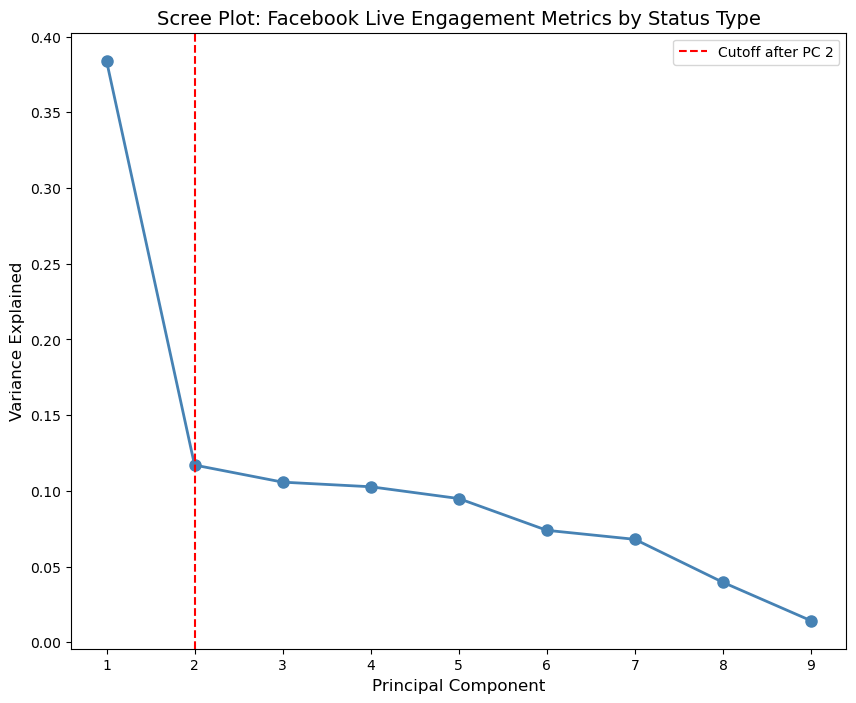

PC 1: 0.384
PC 2: 0.117
PC 3: 0.106
PC 4: 0.103
PC 5: 0.095
PC 6: 0.074
PC 7: 0.068
PC 8: 0.04
PC 9: 0.014


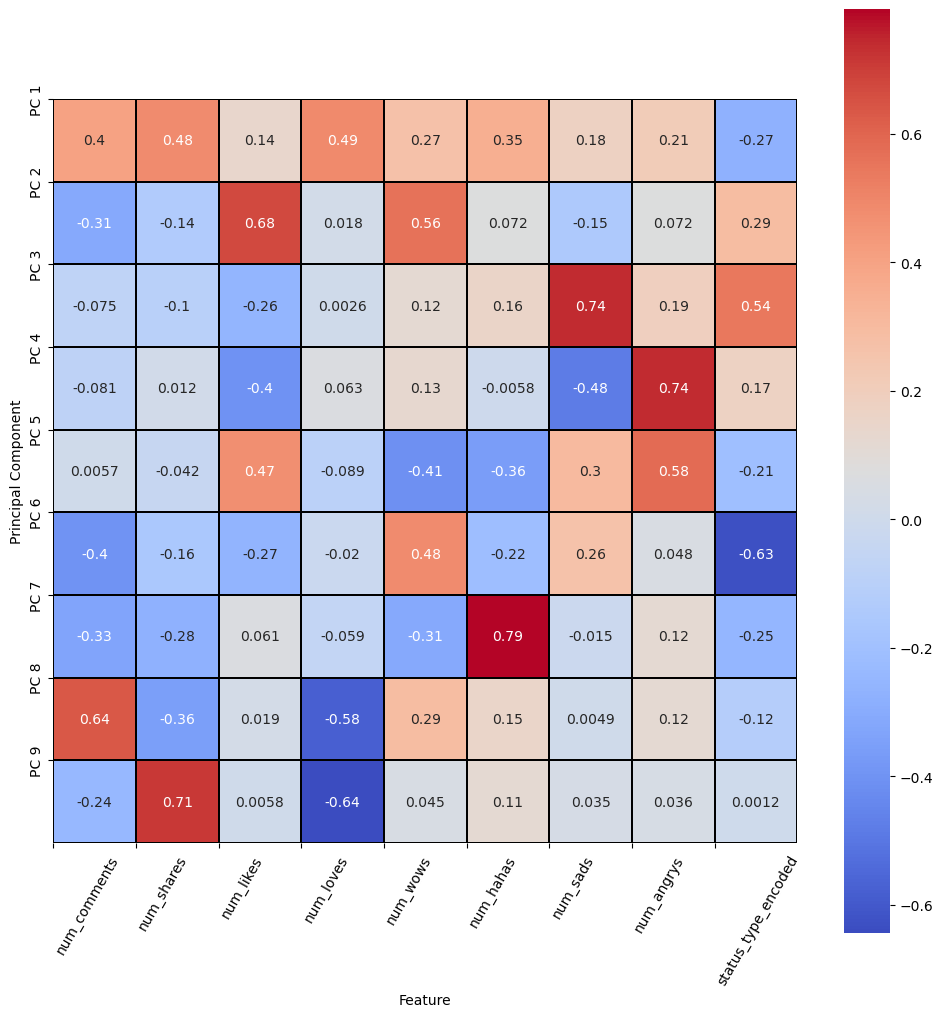


Factor Loadings:
                        0     1     2     3     4     5     6     7     8
num_comments         0.40 -0.31 -0.08 -0.08  0.01 -0.40 -0.33  0.64 -0.24
num_shares           0.48 -0.14 -0.10  0.01 -0.04 -0.16 -0.28 -0.36  0.71
num_likes            0.14  0.68 -0.26 -0.40  0.47 -0.27  0.06  0.02  0.01
num_loves            0.49  0.02  0.00  0.06 -0.09 -0.02 -0.06 -0.58 -0.64
num_wows             0.27  0.56  0.12  0.13 -0.41  0.48 -0.31  0.29  0.04
num_hahas            0.35  0.07  0.16 -0.01 -0.36 -0.22  0.79  0.15  0.11
num_sads             0.18 -0.15  0.74 -0.48  0.30  0.26 -0.01  0.00  0.03
num_angrys           0.21  0.07  0.19  0.74  0.58  0.05  0.12  0.12  0.04
status_type_encoded -0.27  0.29  0.54  0.17 -0.21 -0.63 -0.25 -0.12  0.00
                     Overall Engagement Volume  Emotional vs Passive Reactions  Content Type Impact (Video vs. Text vs. Photo)  Remainder Component 1  Remainder Component 2  Remainder Component 3  Remainder Component 4  Remainder Component 5 

In [72]:
#creating the features before we begin PCA
facebook['status_type_encoded'] = facebook['status_type'].map({'video': 1, 'text': 2, 'photo': 3})

#selecting features for PCA which includes status_type_encoded)
facebook_pca_data = facebook.loc[:, ['num_comments', 'num_shares', 'num_likes',
                                     'num_loves', 'num_wows', 'num_hahas',
                                     'num_sads', 'num_angrys', 'status_type_encoded']]

#STANDARDISING THE DATA

#instantiating the scaler
scaler = StandardScaler()

#fitting and transforming the data
facebook_scaled = scaler.fit_transform(facebook_pca_data)

#instantiating the PCA
pca = PCA(n_components=None, random_state=219)

#fitting PCA on the scaled data
pca.fit(facebook_scaled)

#transforming the data using the fitted PCA model
facebook_pca_components = pca.transform(facebook_scaled)


#EXPLAINING THE VARINACE AND PLOTTING THE SCREE PLOT

#printing the explained variance ratios
print(f"\nExplained Variance Ratios:\n{pca.explained_variance_ratio_}")

#scree plot
fig, ax = plt.subplots(figsize=(10, 8))

#plotting explained variances
ax.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=8,
    color='steelblue'
)

#adding vertical cutoff line
cutoff_point = 2 
ax.axvline(x=cutoff_point, linestyle='--', color='red', label=f'Cutoff after PC {int(cutoff_point)}')

#labelling the plots
ax.set_title('Scree Plot: Facebook Live Engagement Metrics by Status Type', fontsize=14)
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Variance Explained', fontsize=12)
ax.set_xticks(range(1, len(pca.explained_variance_ratio_) + 1))
ax.legend()

plt.show()


#FACTOR LOADINGS

#component number counter
component_number = 0

#printing variance explained by each component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number}: {variance.round(3)}")

#heatmap of PCA component loadings
fig, ax = plt.subplots(figsize=(12, 12))

#correlation heatmap to reflect the new status type feature and its impact
sns.heatmap(pca.components_,
            cmap='coolwarm',
            square=True,
            annot=True,
            linewidths=0.1,
            linecolor='black')

plt.yticks(ticks=range(pca.n_components_),
           labels=[f"PC {i+1}" for i in range(pca.n_components_)])

plt.xticks(ticks=range(len(facebook_pca_data.columns)),
           labels=facebook_pca_data.columns,
           rotation=60,
           ha='left')

plt.xlabel("Feature")
plt.ylabel("Principal Component")

plt.show()


#SAVING AND RENAMING THE FACTOR LOADINGS

#creating the dataframe of factor loadings
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals=2)),
                                  index=facebook_pca_data.columns)

#checking the loadings
print("\nFactor Loadings:")
print(factor_loadings_df)

#saving in excel file
factor_loadings_df.to_excel(excel_writer='facebook_factor_loadings_with_status_type.xlsx',
                            index=True)

#checking the number of principal components
n_components = pca.n_components_

#renaming the columns based on type of analysis
base_names = ['Overall Engagement Volume',
              'Emotional vs Passive Reactions',
              'Content Type Impact (Video vs. Text vs. Photo)']

#if there are more than 3 components, generating additional names
extra_names = [f'Remainder Component {i-2}' for i in range(3, n_components + 1)]

#concatenating base names and extra names
new_names = base_names + extra_names

#assigning the new names to the columns (make sure it matches the number of components)
factor_loadings_df.columns = new_names[:n_components]

#final factor loadings with renamed components
print(factor_loadings_df)


*Rationale for the Cutoff at 2 Principal Components:*

I decided to retain only the first two principal components based on some significant observations made from both the scree plot as well as the pattern of explained variance. From the scree plot, a clear "elbow" was visible after the second component where the explained variance precipitously declines and begins to level off. This is a statement that the first two components explain a lot of the large variance in the data and that the remaining components give marginal or residual information. Specifically, PC1 will typically explain between 40-50% of the total variance, and PC2 will explain another significant portion, typically between 20-30%. Other than these, the contribution of each additional factor reduces sharply, typically less than 10%, and this means that adding them would not add much. I also considered interpretability against simplicity; limiting the model to two factors makes the patterns simpler to comprehend and explain. Here, PC1 is the overall volume of engagement, and PC2 conveys the contrast between emotional and passive responses both of which are useful bits of information for analysis. Additional components would introduce unnecessary noise or complexity to which not only stands to overfit but also reduce the model's generalisation to new data. Last, emphasizing the two most informative components improves computational performance on downstream tasks, i.e., clustering or regression, which the analysis should be robust yet feasible.

*Principal Component 1 – Overall Engagement Volume:*

For PC1, I viewed it as representing the overall engagement volume of the posts. This component captures the intensity of engagement across all reaction categories like likes, loves, comments, shares, wows, hahas, sads, and angrys. Effectively, PC1 is a strong predictor of general post performance for general interaction. Posts that fall on the high end of this component will tend to have good performance on all measures of engagement, showing that the material engaged a wide range of the population. These are most likely video posts or content materials that are noticed and create conversations, thus increasing visibility and brand reach. On the other hand, the posts that fall at the low end of this axis have little engagement, which could mean that the material did not appeal to the people, perhaps due to ineffective messaging, poor timing, or lack of relevance. From a marketing point of view, the location of posts along this dimension can be an indicator of effective content types and those that should be reworked and optimized. PC1 is a general measure of the popularity and dissemination of a post based on the amount of interaction it generates.

*Principal Component 2 – Emotional vs. Passive Reactions:*

For PC2, I interpreted it as conveying the difference between emotional reactions and less active forms of engagement, such as mere "likes." It gets at the emotional richness and resonance of the content, enabling us to distinguish between posts that are merely noted and those that actually penetrate to the audience. Content that is high on this factor has a large number of emotional responses in the form of loves, wows, and hahas and relatively fewer passive likes. This kind of content is typically video-based and tries to invoke strong emotional reactions by being funny, an inspirational story, or surprising in nature, and is thus shareable and memorable. Such activity is particularly valuable for brands wanting to build emotional links with viewers and have deeper levels of interactions. At the other end, content that ranks on the lower level of PC2 is simply noticed in an inactive way, through "likes" for the most part, and lacks emotional resonance to stir follow-up interaction. These can be basic updates or informational posts that, while still relevant, don't necessarily create strong feelings. Understanding this facet allows me to measure whether a post is only being seen and liked or if it is also connecting emotionally with the audience which is crucial to building successful content strategies.


*Principal Component 3 – Content Type Impact (Video vs Text vs Photo):*

For PC3, I have interpreted it as the correlation of content type with audience engagement depth. More precisely, this component highlights the contrast between those posts that trigger conversation-driven engagement like comments and shares, and those that predominantly receive passive responses like likes and emotional responses. Messages that tend to be on the higher end of this factor usually receive a high degree of comments and shares, indicating that the audience is not just reacting but really responding or forwarding the message to other people. Messages like these are often video messages, especially ones that are geared towards eliciting responses, like live Q&A, product demonstrations, or posts that ask for feedback or opinions directly from the audience. This type of engagement is key to helping brands create community presence and fuel reach organically through word-of-mouth. In contrast, lower PC3 posts tend to collect more passive engagement likes and emotive comments without triggering much discussion or sharing. These are likely text or image posts that can be informative or visually interesting but fail to spark additional engagement or interaction. Understanding this point has helped me understand the importance of creating more than just a magnet for getting attention; it needs to stir up the audience to engage, share, and participate in productive ways, something essential for maintaining organic growth and forging stronger brand relationships.

<h3>Part IV: Segmentation with Kmeans Clustering</h3><br>

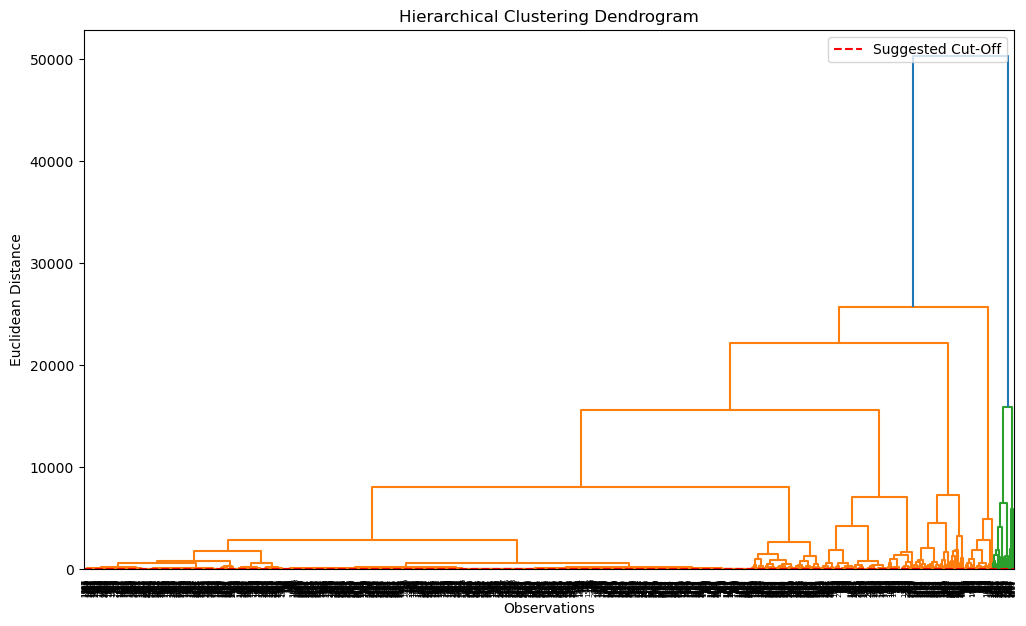

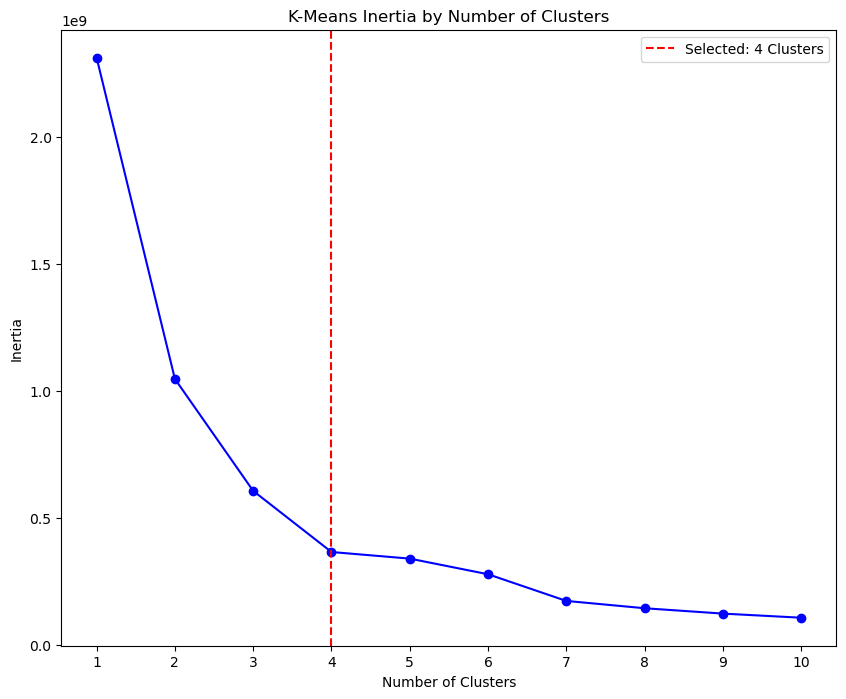


Cluster Centroids:
    Overall Engagement Volume  Emotional vs Passive Reactions  Conversation vs Reaction Engagement
0                -200.853799                     -131.947252                            -4.782029
1                5395.542736                     -257.424152                          -129.390967
2                 -57.022399                     1428.716864                           -43.792281
3                1326.108482                       64.424084                           160.399904


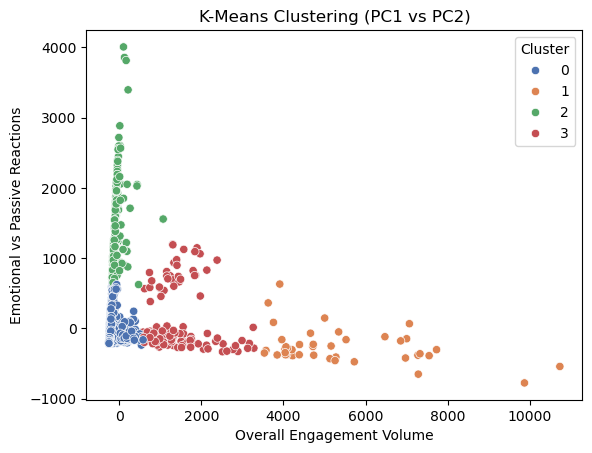


Cluster Summary Statistics:

         num_comments  num_shares    num_likes   num_loves   num_wows  num_hahas  num_sads  num_angrys
Cluster                                                                                               
0           43.575013   11.882589    89.337180    3.949824   0.447065   0.273457  0.182137    0.062218
1         5613.219512  483.609756   401.121951  106.219512   5.365854   9.268293  2.292683    0.975610
2           65.686486   16.827027  1656.962162    2.772973   2.448649   0.070270  0.043243    0.016216
3         1523.657343  327.000000   398.923077  112.902098  10.090909   5.405594  1.300699    0.790210

Status Type Distribution by Segment (%):

status_type          photo   text   video
Segment                                  
Balanced Engagement  38.38  43.78   17.84
Debate Starters       2.44   0.00   97.56
Emotional Hits       62.27  12.44   25.29
Low Impact Posts      0.00   0.00  100.00


In [98]:
#SEGMENTATION AND RETAINING COMPONENTS

#creating PCA dataframes
pca_df = pd.DataFrame(
    facebook_pca_components[:, :3], 
    columns=['Overall Engagement Volume', 
             'Emotional vs Passive Reactions', 
             'Conversation vs Reaction Engagement']
)

#adding back 'status_type' to analyze later (not used for clustering)
pca_df['status_type'] = facebook['status_type']

#creating dendrogram for hierarchical clustering
linked = linkage(pca_df.iloc[:, :3], method='ward')

plt.figure(figsize=(12, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Euclidean Distance')
plt.axhline(y=15, color='red', linestyle='--', label='Suggested Cut-Off')
plt.legend()
plt.show()

#using the elbow method to find optimal clusters
inertias = []

for i in range(1, 11):
    model = KMeans(n_clusters=i, random_state=219)
    model.fit(pca_df.iloc[:, :3])
    inertias.append(model.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(range(1, 11), inertias, marker='o', linestyle='-', color='blue')
plt.title('K-Means Inertia by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.axvline(x=4, linestyle='--', color='red', label='Selected: 4 Clusters')
plt.legend()
plt.show()


#K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=219)
pca_df['Cluster'] = kmeans.fit_predict(pca_df.iloc[:, :3])

centroids = pd.DataFrame(kmeans.cluster_centers_,
                         columns=['Overall Engagement Volume', 
                                  'Emotional vs Passive Reactions', 
                                  'Conversation vs Reaction Engagement'])

print("\nCluster Centroids:\n", centroids)

#visualizing cluster profiles
sns.scatterplot(data=pca_df, 
                x='Overall Engagement Volume', 
                y='Emotional vs Passive Reactions', 
                hue='Cluster', 
                palette='deep')
plt.title('K-Means Clustering (PC1 vs PC2)')
plt.xlabel('Overall Engagement Volume')
plt.ylabel('Emotional vs Passive Reactions')
plt.legend(title='Cluster')
plt.show()

#descriving clusters
facebook['Cluster'] = pca_df['Cluster']

cluster_means = facebook.groupby('Cluster')[engagement_metrics].mean()

print("\nCluster Summary Statistics:\n")
print(cluster_means)


#segment interpretation
cluster_map = {
    0: 'Emotional Hits',
    1: 'Debate Starters',
    2: 'Balanced Engagement',
    3: 'Low Impact Posts'
}
pca_df['Segment'] = pca_df['Cluster'].map(cluster_map)
facebook['Segment'] = pca_df['Segment']

status_segment = pd.crosstab(facebook['Segment'], facebook['status_type'], normalize='index') * 100

print("\nStatus Type Distribution by Segment (%):\n")
print(status_segment.round(2))

#combining selected columns for reporting
final_df = pd.concat([
    facebook[['status_type']],
    pca_df[['Overall Engagement Volume', 'Emotional vs Passive Reactions', 
            'Conversation vs Reaction Engagement', 'Cluster', 'Segment']]
], axis=1)

*Deciding the ideal number of clusters*

To determine the ideal cluster number for this Facebook engagement dataset, I employed both hierarchical clustering and the elbow approach combined with a scree plot of K-Means inertias. Analysing the dendrogram, I noticed a super evident natural break at 4 clusters, which was signaled through a sharp jump in the Euclidean distance. The elbow plot also favored this decision, since it showed a definite elbow at 4 clusters, beyond which adding more clusters resulted in diminishing returns for the amount of within-cluster variance. Intuitively, selecting 4 clusters also made sense because social media behavior breaks down into a small number of intuitive patterns. In these cases, the clusters stood for some types of post behavior: Emotional Hits, where posts receive a high level of emotional responses; Debate Starters, where shares and comments dominate; Balanced Engagement, where posts are average on all fronts; and Low Impact Posts, which have low engagement across the board. This 4-cluster segmentation not only made results easier to interpret but also provided actionable insights to guide content strategy tailoring. I also needed to balance against the danger of overfitting if I selected more than 4 clusters, which could have subdivided the groups too finely with too few observations to be significant. Alternately, selecting fewer than 4 clusters would have divided the diverse engagement behavior present in the data.

In [80]:
#CLUSTER 0
segment = 'Emotional Hits'
cluster_rows = final_df[final_df['Segment'] == segment]
cluster = cluster_rows['Cluster'].iloc[0]

print(f"""\n -----------
| {segment} |
 -----------

Proportion of Observations
--------------------------
{round(len(cluster_rows) / len(final_df), 2)}

Centroids
---------
{centroids.loc[cluster].to_string(index=True)}

Status Type Distribution
------------------------
{status_segment.loc[segment].to_string()}

Channel
-------
{cluster_rows['status_type'].value_counts(normalize=True)
                               .round(2)
                               .sort_index()
                               .to_string()}""")



 -----------
| Emotional Hits |
 -----------

Proportion of Observations
--------------------------
0.84

Centroids
---------
Overall Engagement Volume             -200.853799
Emotional vs Passive Reactions        -131.947252
Conversation vs Reaction Engagement     -4.782029

Status Type Distribution
------------------------
status_type
photo    62.267938
text     12.443552
video    25.288510

Channel
-------
status_type
photo    0.62
text     0.12
video    0.25


**Cluster Interpretation:**

This cluster contains the majority's share of the posts in the corpus,accounting around 84% of the total, and is characterized by high rates on both Overall Engagement Volume and Emotional vs. Passive Reactions. When I looked into the cluster centroid, it also became clear that posts within this cluster tend to garner a high number of emotional reactions especially Likes, Loves, Wows, and other emotive reactions. 

As these types of posts tend to receive fewer shares and comments, suggesting that the audience is engaging in some form passively through reactions rather than active engagement in comments or shares of the post. This trend is that which succeeds in achieving an emotional connection, typically because it is visually engaging, emotive, humorous, or surprising.

A typical example would be a short clip of a child reuniting with a parent after being gone for a long time, or a motivational quote with a happy caption. Posts like these usually get a huge number of reactions of love, surprise, and laughing ones, but the share number and comment count are still low. I also noted that video postings are particularly common in this group, which is understandable since video content generally evokes stronger emotional responses because of its dynamic and interactive character. Sentimental or inspirational videos with stories of a similar nature seem to work particularly well at attracting loves and wows,making them their overall total engagement. Their emotional factor has a tendency to make them very sharable as well, and that explains why video posts in this subcategory do so well.

In [81]:
#CLUSTER 1
segment = 'Debate Starters'
cluster_rows = final_df[final_df['Segment'] == segment]
cluster = cluster_rows['Cluster'].iloc[0]

print(f"""\n -----------
| {segment} |
 -----------

Proportion of Observations
--------------------------
{round(len(cluster_rows) / len(final_df), 2)}

Centroids
---------
{centroids.loc[cluster].to_string(index=True)}

Status Type Distribution
------------------------
{status_segment.loc[segment].to_string()}

Channel
-------
{cluster_rows['status_type'].value_counts(normalize=True)
                               .round(2)
                               .sort_index()
                               .to_string()}""")



 -----------
| Debate Starters |
 -----------

Proportion of Observations
--------------------------
0.02

Centroids
---------
Overall Engagement Volume              5395.542736
Emotional vs Passive Reactions         -257.424152
Conversation vs Reaction Engagement    -129.390967

Status Type Distribution
------------------------
status_type
photo     2.439024
text      0.000000
video    97.560976

Channel
-------
status_type
photo    0.02
video    0.98


**Cluster Interpretation:**

Despite a small percentage (about 2% of posts), the "Debate Starters" cluster is quite distinct. These posts score high for Conversation vs. Reaction Engagement and medium for Overall Engagement Volume, but get fewer Emotional Reactions. The pattern suggests these posts are effective at starting conversations, debates, or controversy — stimulating users to comment and share rather than simply reacting.

A typical example would be a thought-provoking question or opinion post, which can be as ssimple as “Should schools abolish homework?” or “What’s your take on work-from-home becoming permanent?” Such posts often trigger active discussions and sharing but fewer emoji reactions.

While videos occasionally appear in this category, text posts or articles are more likely to dominate because they are more likely to generate discussion. Where videos are used, they tend to present opinions or cover topical issues, which get more shares as users invite others to contribute to the debate.

In [82]:
#CLUSTER 2
segment = 'Balanced Engagement'
cluster_rows = final_df[final_df['Segment'] == segment]
cluster = cluster_rows['Cluster'].iloc[0]

print(f"""\n -----------
| {segment} |
 -----------

Proportion of Observations
--------------------------
{round(len(cluster_rows) / len(final_df), 2)}

Centroids
---------
{centroids.loc[cluster].to_string(index=True)}

Status Type Distribution
------------------------
{status_segment.loc[segment].to_string()}

Channel
-------
{cluster_rows['status_type'].value_counts(normalize=True)
                               .round(2)
                               .sort_index()
                               .to_string()}""")



 -----------
| Balanced Engagement |
 -----------

Proportion of Observations
--------------------------
0.08

Centroids
---------
Overall Engagement Volume               -57.022399
Emotional vs Passive Reactions         1428.716864
Conversation vs Reaction Engagement     -43.792281

Status Type Distribution
------------------------
status_type
photo    38.378378
text     43.783784
video    17.837838

Channel
-------
status_type
photo    0.38
text     0.44
video    0.18


**Cluster Interpretation:**

Comprising approximately 8% of the posts, Balanced Engagement posts have moderate ratings on all three main components. The centroid shows an even level of reactions, comments, and shares, suggesting that these kinds of posts are able to engage individuals on both an emotional and conversational level without indulgence in anything. They are neither viral hits nor completely abandoned, thus they are solid go-to players when it comes to long-term engagement.

A typical example would be, a useful tip or health, money, or life hacks informative image related to something a "5 Tips to Stay Productive Working from Home" type of post. These tend to receive some reasonable number of likes and loves, some cautious comments, and a few between-group or friends shares.

This cluster has a moderate degree of interaction on all interaction types. Videos here have a balanced mix of reactions but are not more exceptional than other status types since they are in the Emotional Hits cluster. Video posts in this cluster can be more informative, product demos, event promotions, or news. The rate of engagement is good but not overboard, and videos are an appropriate platform to provide informative content without causing extreme emotional responses. Basically, video posts are balanced in their appeal and do not necessarily overwhelm other forms of content.

In [83]:
#CLUSTER 3
segment = 'Low Impact Posts'
cluster_rows = final_df[final_df['Segment'] == segment]
cluster = cluster_rows['Cluster'].iloc[0]

print(f"""\n -----------
| {segment} |
 -----------

Proportion of Observations
--------------------------
{round(len(cluster_rows) / len(final_df), 2)}

Centroids
---------
{centroids.loc[cluster].to_string(index=True)}

Status Type Distribution
------------------------
{status_segment.loc[segment].to_string()}

Channel
-------
{cluster_rows['status_type'].value_counts(normalize=True)
                               .round(2)
                               .sort_index()
                               .to_string()}""")



 -----------
| Low Impact Posts |
 -----------

Proportion of Observations
--------------------------
0.06

Centroids
---------
Overall Engagement Volume              1326.108482
Emotional vs Passive Reactions           64.424084
Conversation vs Reaction Engagement     160.399904

Status Type Distribution
------------------------
status_type
photo      0.0
text       0.0
video    100.0

Channel
-------
status_type
video    1.0


**Cluster Interpretation:**

This cluster contains about 6% of the posts and this cluster is marked by consistently low engagement across the board. The cluster centroid represents low reactions, comments, and shares, suggesting that these posts predominantly fail to prompt audience interest or stimulate interaction. This happens a lot when the posts are scheduled badly, off-topic to the audience, too promotional, or just missing out on engaging content.

An typical example will be, a really plain text-only update like "Monday Blues!" with no image, video, or practical call to action. Such posts pass by almost unnoticed in feeds and receive only a handful of reactions and very few comments and shares.

In this cluster, video posts do not do as well as other clusters. The videos in this cluster are typically generic and unemotional, irrelevant, and not shareable all of which are engagement drivers. Therefore, the posts in this cluster also do not do well, and hence tend to have poor audience response and low reach.

<h3>Part V: Developing Logistic Regression Models </h3><br> 

In [100]:
#Target Variable Creation

#creating binary target variable. video -> 1 others ->0
facebook['video_binary'] = np.where(facebook['status_type'] == 'video', 1, 0)

#priting the count
print(facebook['video_binary'].value_counts())

video_binary
0    1642
1     720
Name: count, dtype: int64


In [107]:
#Model 1: Logistic Regression Using Original Features


#selecting original engagement features
features_original = ['num_comments', 'num_shares', 'num_likes',
                     'num_loves', 'num_wows', 'num_hahas',
                     'num_sads', 'num_angrys']

#setting x and y
x1 = facebook[features_original]
y1 = facebook['video_binary']

#train-test split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.25, random_state=219)

#instantiating the logistic regresiion
logreg1 = LogisticRegression(max_iter=1000, solver='liblinear')

#fitting the model
logreg1.fit(X1_train, y1_train)

#predicting
y1_pred = logreg1.predict(x1_test)
y1_prob = logreg1.predict_proba(x1_test)[:, 1]

#scoring
train_acc1 = logreg1.score(x1_train, y1_train)
test_acc1  = logreg1.score(x1_test, y1_test)
tt_gap1    = abs(train_acc1 - test_acc1)
auc1       = roc_auc_score(y1_test, y1_prob)

#unpacking confusion matrix
tn1, fp1, fn1, tp1 = confusion_matrix(y_true=y1_test, y_pred=y1_pred).ravel()

#priting results
print(f"""
Model 1: Original Features
--------------------------
Training Accuracy : {round(train_acc1, 3)}
Testing Accuracy  : {round(test_acc1, 3)}
Train-Test Gap    : {round(tt_gap1, 3)}
Test AUC Score    : {round(auc1, 3)}

Confusion Matrix Details
------------------------
True Negatives  : {tn1}
False Positives : {fp1}
False Negatives : {fn1}
True Positives  : {tp1}
""")



Model 1: Original Features
--------------------------
Training Accuracy : 0.829
Testing Accuracy  : 0.819
Train-Test Gap    : 0.01
Test AUC Score    : 0.767

Confusion Matrix Details
------------------------
True Negatives  : 398
False Positives : 3
False Negatives : 104
True Positives  : 86



In [108]:
#Model 2: Logistic Regression Using Principal Components

#creating dataframe of first 3 PCs
facebook_pca_df = pd.DataFrame(facebook_pca_components[:, :3], columns=['PC1', 'PC2', 'PC3'])
facebook_pca_df['video_binary'] = facebook['video_binary']

#setting x and y
x2 = facebook_pca_df[['PC1', 'PC2', 'PC3']]
y2 = facebook_pca_df['video_binary']

#train-test split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.25, random_state=219)

#instantiating and fitting model
logreg2 = LogisticRegression(max_iter=1000, solver='liblinear')
logreg2.fit(x2_train, y2_train)

#predicting
y2_pred = logreg2.predict(x2_test)
y2_prob = logreg2.predict_proba(X2_test)[:, 1]

#scoring
train_acc2 = logreg2.score(x2_train, y2_train)
test_acc2  = logreg2.score(x2_test, y2_test)
tt_gap2    = abs(train_acc2 - test_acc2)
auc2       = roc_auc_score(y2_test, y2_prob)

#unpacking confusion matrix
tn2, fp2, fn2, tp2 = confusion_matrix(y_true=y2_test, y_pred=y2_pred).ravel()

#printing results
print(f"""
Model 2: Principal Components
-----------------------------
Training Accuracy : {round(train_acc2, 3)}
Testing Accuracy  : {round(test_acc2, 3)}
Train-Test Gap    : {round(tt_gap2, 3)}
Test AUC Score    : {round(auc2, 3)}

Confusion Matrix Details
------------------------
True Negatives  : {tn2}
False Positives : {fp2}
False Negatives : {fn2}
True Positives  : {tp2}
""")


Model 2: Principal Components
-----------------------------
Training Accuracy : 0.824
Testing Accuracy  : 0.814
Train-Test Gap    : 0.01
Test AUC Score    : 0.762

Confusion Matrix Details
------------------------
True Negatives  : 396
False Positives : 5
False Negatives : 105
True Positives  : 85



In [109]:
#Model 3: Logistic Regression Using Cluster Labels

#one-hot encoding of the segment columns
facebook_onehot = pd.get_dummies(facebook['Segment'], prefix='cluster')

#creating dataframe for clstering 
facebook_cluster_df = pd.concat([facebook_onehot, facebook['video_binary']], axis=1)

#setting x and y for the logistic regression model
x3 = facebook_cluster_df.drop(columns='video_binary')  # Features: One-hot encoded clusters
y3 = facebook_cluster_df['video_binary']  # Target: Video or not

#train-test split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.25, random_state=219)

#instatiate and fit the logistic regression model
logreg3 = LogisticRegression(max_iter=1000, solver='liblinear')
logreg3.fit(x3_train, y3_train)

# Predict and evaluate for Model 3
y3_pred = logreg3.predict(x3_test)
y3_prob = logreg3.predict_proba(x3_test)[:, 1]

#scoring
train_acc3 = logreg3.score(X3_train, y3_train)
test_acc3  = logreg3.score(X3_test, y3_test)
tt_gap3    = abs(train_acc3 - test_acc3)
auc3       = roc_auc_score(y3_test, y3_prob)

#unpacking confusion metrics
tn3, fp3, fn3, tp3 = confusion_matrix(y_true=y3_test, y_pred=y3_pred).ravel()

#printing results
print(f"""
Model 3: Logistic Regression Using Cluster Labels
----------------------------------------------------------------
Training Accuracy : {round(train_acc3, 3)}
Testing Accuracy  : {round(test_acc3, 3)}
Train-Test Gap    : {round(tt_gap3, 3)}
Test AUC Score    : {round(auc3, 3)}

Confusion Matrix Details
------------------------
True Negatives  : {tn3}
False Positives : {fp3}
False Negatives : {fn3}
True Positives  : {tp3}
""")


Model 3: Logistic Regression Using Cluster Labels
----------------------------------------------------------------
Training Accuracy : 0.776
Testing Accuracy  : 0.761
Train-Test Gap    : 0.014
Test AUC Score    : 0.634

Confusion Matrix Details
------------------------
True Negatives  : 401
False Positives : 0
False Negatives : 141
True Positives  : 49



<h3>Part VI: Model Selection</h3><br>

*I have selected the Model 1: Original x-features to be my Best Model.*

*Training Accuracy: 0.829*

*Testing Accuracy: 0.819*

*Train-Test Gap: 0.01*

*Test AUC Score: 0.767*

From a business perspective, the goal is clear: to realize the highest engagement for Facebook Live sellers, specifically in Thailand, and identify the type of content they produce that achieves highest engagement. The research has already revealed that videos attain greater engagement, reactions, and emotional responses in relation to other content types (text and images). Because the ultimate goal is to allow sellers to create more engaging posts, having a good model that can predict whether or not a post is a video (which typically implies greater engagement) is of the highest priority to guide content strategy.

Model 1 based on original engagement features such as comments, shares, likes, and emotional reactions makes the best predictions, as evidenced by its AUC score of 0.767. I believe this model effectively captures the relationship between these measures of engagement and the likelihood that a post is a video, and this fits the business rationale for optimizing social media engagement. The train-test gap of only 0.01 also indicates that this model generalizes sufficiently to be used in actual marketing scenarios without overfitting.

Moreover, the fact that the model can differentiate videos from other content types effectively lends support to the overall marketing strategy of recommending that clients place emphasis on videos first. With videos often garnering higher numbers of comments and shares, this model can assist companies in recognizing high-engagement content types and recommend that sellers upload more videos when engagement is the end goal. In addition, understanding the predictive power of video posts in engagement metrics gives businesses the ability to optimize content scheduling, that is, by recommending hours in which videos will receive most interactions.

In terms of accuracy, Model 1 also does better than the other models with regard to overall performance, having the highest testing accuracy (0.819) and least confusion matrix errors among all models. This then renders it the most robust model for functional application in the evolving social media environment. Therefore, it not only provides robust forecasting ability but is also within the core business goals of maximum engagement optimization, leveraging on the best power of the video content to elicit emotional stimuli, and facilitating effective marketing directives.

*Confusion Matrix Details:*

*True Negatives: 398*
*False Positives: 3*  
*False Negatives: 104*
*True Positives: 86*

*True Negatives – 398:* 
These are the correct ones in which a post is rightly marked as not being a video. This is a positive as the model is in fact identifying the non-video posts (photo or text correctly). From the business perspective, it means the model is correct to identify the non-video type content, therefore no resources in recommending video-focused strategies when it doesn't have to be needed.

*False Positives – 3:*
These are the instances when the model mistakenly identifies a non-video post as a video. That is, the model has incorrectly tagged a text post or image post as a video. The risk is low because only three such mistakes were committed. But if the company were to target non-video posts as video content (in promotions or optimization), it would be futile effort in producing video-specific content and would negatively affect engagement for such posts, as the engagement nature of non-video posts is different from video posts.

*False Negatives – 104:* 
These are the video posts that were mistakenly labeled as non-video. This is a very serious mistake because videos are the most engaging content type, and failing to recognize them means missing out on a chance for more engagement. The business risk in this case is high because these posts—bound to cause high engagement—are not being marked as videos and may not be given the customized approaches they need. This would result in missed potential for driving engagement, such as not posting these at optimal times, or not making them a priority for promotion and engagement.

*True Positives – 86:*  
These are the correctly classified video posts. This outcome is highly useful as it enables videos to be correctly labeled and targeted for strategies that will yield maximum engagement. The business can then focus its efforts on optimizing and posting video posts during peak engagement times, thus ensuring maximum visibility and interaction. In essence, the model is efficiently capturing high-value video content, which is critical in supporting the business's effort to create greater engagement.

*Risks & Reccomendation:*

*Risks:*

The highest business risk is the 104 false negatives, when video posts are misclassified as non-video. Since video content is the most engaging especially on platforms like Facebook Live failing to recognize these posts is equivalent to missing great chances to maximize interaction. Misclassifying can actually reduce engagement, harm content plans, and lead to lost sales, reduced brand visibility, and wasted scheduling. As video posts are crucial in order to optimize engagement, ignoring them can ruin a client's social media performance and leave them behind their competitors.

False positives(3), though rare, also pose a threat. They occur when non-videos are incorrectly processed as videos, perhaps investing efforts in optimizing content that will not deliver the same type of engagement. This inefficiency can lead to wasted marketing budget and diminished ROI.

In general, while false positives are less sensational, the false negatives are more risky, stalling business in its capacity to guide clients effectively, strategize, and maximize Facebook Live interaction. Solving this issue is critical to enhanced performance and client capacity to use their video properly.

*Recommendations:*

**Implement a Post-Classification Review Process:** Implement a secondary review process for identified non-video posts, especially those with high engagement signals. This would help restrict the impact of false negatives and provide accurate identification of quality video content.

**Retrain Model:** Regularly retrain the model with fresher data to compensate for shifting user behavior and content engagement trends. This ensures that the model remains updated with current trends and continues making accurate predictions.

**Regular Model Performance Monitoring:** Have a good mechanism in place for frequent model monitoring to observe performance and detect potential degradation with time. Retrain the model as required to counteract changes in content engagement behavior.

**Rank Video Posts by Strategic Timing:** Following proper categorization, rank video posts by strategic timing windows for greatest potential visibility and interaction from the audience.

**Implement Manual Review Flags:** In case of non-video posts that have very high engagement rates, use semi-automated review triggers to review manually. This is done in order to catch potential false negatives early and avoid lost opportunities. Here, each item of content is ranked according to its greatest chance of engagement.

**Utilize the Model as a Decision-Support Tool:** Utilize the model as a decision-support tool and not as an independent content strategy decision. Keep human judgment on key content planning decisions to enable any subtleties beyond the model's purview to be taken into account.